<a href="https://colab.research.google.com/github/Archanasoner/Machine-Learning-Labs/blob/main/Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Dependencies


In [ ]:
!pip install torch torchvision

Importing Libraries

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from collections import OrderedDict

Load MNIST Dataset

Create a transform to normalise the Mnist dataset

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

Download MNIST data

In [ ]:
mnist_train_dataset = datasets.MNIST('mnist_train_data', download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.14MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 156kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.55MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.06MB/s]


In [ ]:
mnist_train_data_loader = torch.utils.data.DataLoader(mnist_train_dataset, batch_size=64, shuffle=True)

Check sample MNIST image

In [ ]:
 train_data_iterator = iter(mnist_train_data_loader)

In [ ]:
train_images, train_labels= next(train_data_iterator)

In [ ]:
train_images.shape

In [14]:
train_labels

tensor([4, 0, 9, 2, 4, 3, 5, 8, 0, 4, 9, 8, 0, 1, 5, 8, 8, 8, 7, 6, 2, 5, 9, 2,
        6, 7, 8, 0, 7, 0, 7, 9, 4, 3, 5, 6, 5, 6, 5, 7, 7, 9, 5, 0, 3, 7, 7, 0,
        1, 2, 1, 3, 3, 1, 6, 7, 7, 5, 8, 4, 2, 2, 6, 0])

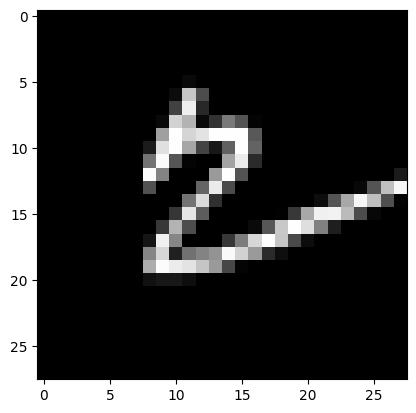

In [16]:
plt.imshow(train_images[3].numpy().squeeze(), cmap='gray')

Build neural network

In [20]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()

    # Defining Neural Network Layers
    #Inputs to hidden layer
    self.hidden_layer = nn.Linear(784, 256)

    #Output layer, 10 units - one for each digit
    self.output_layer = nn.Linear(256, 10)

  def forward(self, x):
    #Pass the input tensor through each of our operations
    #Hidden layer with relu activation
    x = F.relu(self.hidden_layer(x))

    # Output layer with softmax activation
    x = F.softmax(self.output_layer(x), dim=1)
    return x

In [21]:
model = NeuralNetwork()

In [22]:
model

NeuralNetwork(
  (hidden_layer): Linear(in_features=784, out_features=256, bias=True)
  (output_layer): Linear(in_features=256, out_features=10, bias=True)
)

In [23]:
model.hidden_layer

Linear(in_features=784, out_features=256, bias=True)

In [24]:
model.hidden_layer.weight

Parameter containing:
tensor([[ 0.0088,  0.0073, -0.0122,  ..., -0.0142, -0.0115,  0.0298],
        [-0.0032, -0.0154, -0.0348,  ..., -0.0043, -0.0030,  0.0182],
        [-0.0286,  0.0221, -0.0219,  ..., -0.0225, -0.0163, -0.0021],
        ...,
        [-0.0036,  0.0269,  0.0006,  ...,  0.0346, -0.0228, -0.0223],
        [-0.0255, -0.0298,  0.0283,  ..., -0.0125, -0.0027,  0.0276],
        [-0.0329, -0.0199,  0.0220,  ...,  0.0069,  0.0230,  0.0122]],
       requires_grad=True)

In [25]:
model.hidden_layer.weight.data.fill_(0)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

Define a loss function

In [26]:
criterion = nn.CrossEntropyLoss()

Calculating loss for a single batch

In [27]:
train_images.shape

torch.Size([64, 1, 28, 28])

In [28]:
train_images_batch = train_images.view(train_images.shape[0], -1)

In [29]:
train_images_batch.shape

torch.Size([64, 784])

In [30]:
output_predictions = model(train_images_batch)

In [31]:
loss = criterion(output_predictions, train_labels)

In [32]:
loss

tensor(2.3028, grad_fn=<NllLossBackward0>)

Train the network

define optimizer

In [33]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Training using the training Images

In [39]:
epochs = 8
for e in range(epochs):

  training_loss = 0
  for train_images, train_labels in mnist_train_data_loader:

    # Flatten train images batch
    images = train_images.view(train_images.shape[0], -1)
    # Make the gradient values to zero
    optimizer.zero_grad()
    # get output predictions from the images
    output_predictions = model(images)
    # calculate loss
    loss = criterion(output_predictions, train_labels)

    #Do a backward pass to find the gradients
    loss.backward()

    # update the weights of the parameters
    optimizer.step()
    training_loss += loss.item()

else:
  print(f"Training loss for epoch - {e}: {training_loss/len(mnist_train_data_loader)}")

Training loss for epoch - 7: 1.5536538652265504


Inference on a digit

In [40]:
images, labels = next(iter(mnist_train_data_loader))

In [41]:
infer_img = images[0].view(1, 784)

In [42]:
with torch.no_grad():
  output_predictions = model(infer_img)

In [43]:
output_predictions.shape

torch.Size([1, 10])

In [48]:
probabilities = output_predictions.data.numpy().squeeze()

In [49]:
probabilities.shape

(10,)

In [50]:
probabilities

array([1.3960438e-11, 9.9801755e-01, 3.7507871e-05, 1.7475199e-03,
       5.0072524e-10, 3.8186618e-06, 5.5167579e-06, 3.7695936e-06,
       1.4811326e-04, 3.6126770e-05], dtype=float32)

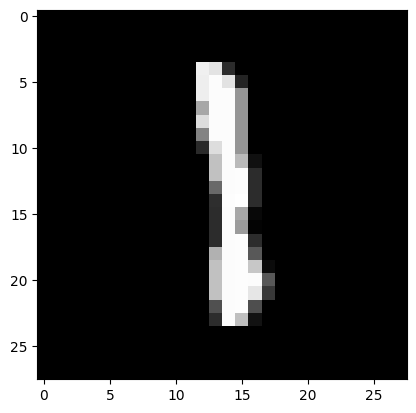

In [54]:
plt.imshow(infer_img.resize_(1, 28, 28).numpy().squeeze(), cmap='gray')